During this blog, I demonstrate what's regression and how it works, as the simplest/oldest machine learning model. I will cover two points as followed:

__1. what's simple linear regression__ <br>
__2. linear regression example in sklearn__ <br>

Just recap, the machine learning can be break down in to supervised and unsupervised. Under the supervised, the models could be further break down to regression and classification based on the label/output. For regression, the label/output is usually a numeric. e.g you want to predict tomorrow's weather in Celsius or you want to predict tomorrow Apple's stock price.

-  ***what's simple linear regression*** <br>

So, ***what is regression?*** Think of regression as a mapping between numeric inputs (predictor varaibles $x_1,x_2,x_3..x_n$) and numeric output ($y$). The easiest example is the simple linear regression (only have one predictor vairable, $x_1$), which is finding a straight line to best map the input $x_1$ to output $y$, so-called "the best fitting line".

 $ y = \beta_0 + \beta_1 x_1 $ + ε

Note: ε stands for the error term, which will be skipped in the later formula

Four additional important concept in linear regression: <br>
***what is the best fitting line?*** <br>
the best fitting line is define as a straight line minimize the error between where the straight line predict the dot to be and where the dot actually is. The error here is called the least squared error. By minimizing this error, the machine/model is finding the best line (the best \beta_1 and \beta_0) to map the input $x_1$ to output $y$. <br>

***what is coefficient?*** <br>
Coefficient is the $\beta_1$. It means when input $x_1$ increase 1 unit, output $y$ increase $\beta_1$ unit correspondingly.<br>

***what is intercept?*** <br>
Intercept is the $\beta_0$. It means when input $x_1$ equals 0 unit, output $y$ equals $\beta_0$.<br>

***what is the R-square?*** <br>
R-square is a measurement used in regression to assess how good the model represent/explain the relationship between x and y.
Ranging from 0 to 1, 0 means the model explain nothing, while 1 means the model explain perfectly the relationship.

-  ***linear regression example in sklearn*** <br>

In [1]:
# import libraries
from sklearn import datasets
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
# load the example dataset and take a look the dataset
boston = datasets.load_boston()
y = boston.target
x = boston.data
print('how many inputs varaible/predictor varaible:',x.shape[1])
print('how many rows of data:',x.shape[0])

how many inputs varaible/predictor varaible: 13
how many rows of data: 506


For the simple linear regression example, we pick up only one input varaible - average number of rooms per dwelling - for demonstration, which is the 6th out of 13 features in the dataset. In addition, I only select the first 10 records out of the 506 records for simplicity.

In [3]:
# select those 10 data points
y = boston.target[0:10]
x = boston.data[:,np.newaxis,5][0:len(y)]

After select those 10 data points, let's take a look the interaction between housing price and number of room using a scatter plot. There is a obvious linear relationship between the price and the number of rooms. More room, more expensive $$.

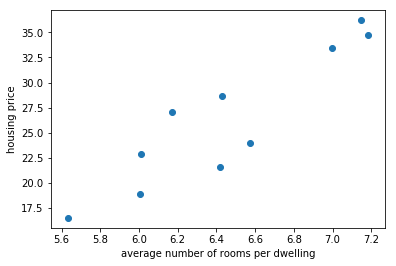

In [4]:
# plot those 10 points
plt.scatter(x, y)
plt.xlabel('average number of rooms per dwelling')
plt.ylabel('housing price')
plt.show()

Let's find a line to fit those ten data points.

In [5]:
# set linear regression as the model
model = linear_model.LinearRegression()

# fit the model with (input, output)
model.fit(x, y)

# make the prediction using the original input
y_pred = model.predict(x)

# output the linear regression model coefficients and intercept
print('Coefficients: ', model.coef_)
print('Intercept: ', model.intercept_)

# output the linear regression evaluation metrics: error and the R-square
print('Error: ',sklearn.metrics.mean_squared_error(y, y_pred))
print('R-square: ',sklearn.metrics.r2_score(y, y_pred))

Coefficients:  [11.82850406]
Intercept:  -49.98256496765094
Error:  6.783211453077881
R-square:  0.8365569983837435


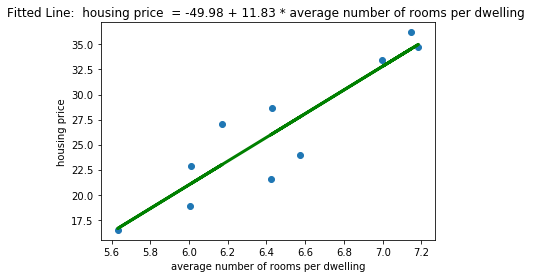

In [6]:
# Plot the line
plt.scatter(x, y)
plt.plot(x, y_pred, color='green', linewidth=3)
plt.xlabel('average number of rooms per dwelling')
plt.ylabel('housing price')
plt.title('Fitted Line:  housing price  = %.2f + %.2f * average number of rooms per dwelling ' 
      % (model.intercept_, model.coef_[0]))
plt.show()

Obviously, this line will not predict well for a hous has house less than 5, it will predict a negative housing price, which will never happen. Reason is because we only feed the model a very small dataset, and all the number of room this this toy data set is bigger than 5.

So far, we only ask the model to predict the data point it has seen before, those 10. What if we want to ask the model to predict some data point it never seen before. Let's try the 11th data point for the boston data set and take a look.

In [7]:
# select those 3 additional data points as test set
y_test = boston.target[11:14]
x_test = boston.data[:,np.newaxis,5][11:14]

In [8]:
print('three new input - average number of rooms per dwelling:\n',x_test)

three new input - average number of rooms per dwelling:
 [[6.009]
 [5.889]
 [5.949]]


In [9]:
# make the prediction using the new input
y__test_pred = model.predict(x_test)
print('three predicted output - predicted housing price: \n', y_pred)

three predicted output - predicted housing price: 
 [27.78984923 25.9682596  35.0052367  32.79330644 34.55575355 26.07471614
 21.13040144 23.02296209 16.62374139 21.03577341]


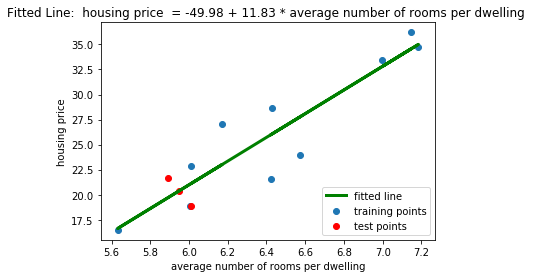

In [10]:
# Add the test set in to the plot
plt.scatter(x, y,label="training points")
plt.scatter(x_test, y_test,color='red',label="test points")
plt.plot(x, y_pred, color='green', linewidth=3,label="fitted line")
plt.xlabel('average number of rooms per dwelling')
plt.ylabel('housing price')
plt.title('Fitted Line:  housing price  = %.2f + %.2f * average number of rooms per dwelling ' 
      % (model.intercept_, model.coef_[0]))
plt.legend(loc='lower right')
plt.show()

For these three new data points, the line get one housing price correct, while the other two points' predicted price is slightly overestimated, and underestimated.